## Import Libraries

In [49]:
import sklearn as skl
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

---
## DATASET

O Dataset de teino é constituido por 5000 casos e pelos seguintes atributos: 

* **city_name** - nome da cidade em causa;
* **record_date** - o timestamp associado ao registo;
* **magnitude_of_delay** - magnitude do atraso provocado pelos incidentes que se verificam no record_date correspondente;
* **delay_in_seconds** - atraso, em segundos, provocado pelos incidentes que se verificam no record_date correspondente;
* **affected_roads** - estradas afectadas pelos incidentes que se verificam no record_date correspondente;
* **luminosity** - o nível de luminosidade que se verificava na cidade de Guimarães;
* **avg_temperature** - valor médio da temperatura para o record_date na cidade de Guimarães;
* **avg_atm_pressure** - valor médio da pressão atmosférica para o record_date na cidade de Guimarães;
* **avg_humidity** - valor médio de humidade para o record_date na cidade de Guimarães;
* **avg_wind_speed** - valor médio da velocidade do vento para o record_date na cidade de Guimarães;
* **avg_precipitation** - valor médio de precipitação para o record_date na cidade de Guimarães;
* **avg_rain** - avaliação qualitativa do nível de precipitação para o record_date na cidade de Guimarães;
* **incidents** - indicação acerca do nível de incidentes rodoviários que se verificam no record_date correspondente na cidade de Guimarães.

---

## Get the Data

In [50]:
traffic = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

## Data Visualisation

In [51]:
traffic.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [52]:
traffic.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 

In [53]:
print(traffic.isna().sum()) #Verifica missing values

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64


In [54]:
traffic.nunique() # Verifica quantos valores direnetes cada feature tem

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [55]:
traffic['magnitude_of_delay'].value_counts()

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64

In [56]:
traffic['affected_roads'].value_counts()

N101,N101,N101,N101,N101                                                                                                                                      1514
N101,N101,N101,N101,N101,                                                                                                                                     1078
,                                                                                                                                                              709
N101,N101                                                                                                                                                      149
N101,N101,N101,N101,N101,N101                                                                                                                                  114
                                                                                                                                                              ... 
N101,N101,N105,N105,N1

In [57]:
traffic['record_date'].value_counts()

2021-03-15 23:00    1
2021-10-29 07:00    1
2021-04-25 03:00    1
2021-03-17 17:00    1
2021-07-22 00:00    1
                   ..
2021-10-19 00:00    1
2021-10-22 23:00    1
2021-12-04 23:00    1
2021-09-13 23:00    1
2021-12-20 02:00    1
Name: record_date, Length: 5000, dtype: int64

In [58]:
traffic['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

In [59]:
traffic['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

In [60]:
traffic['incidents'].value_counts()

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64

In [61]:
print(traffic.duplicated().sum()) # Verifica se há valores duplicados

0


In [62]:
sns.set_theme(palette="flare")

<AxesSubplot: xlabel='incidents', ylabel='Count'>

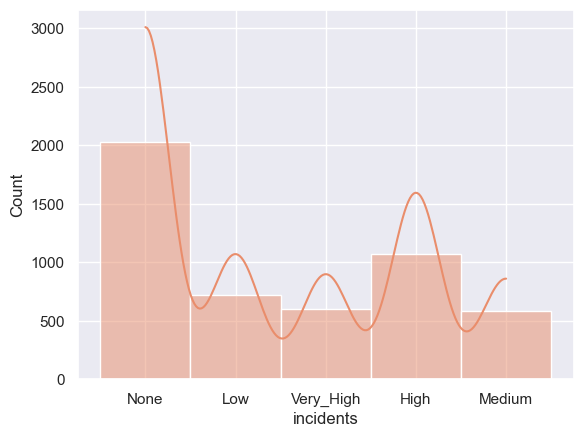

In [63]:
sns.histplot(traffic['incidents'],kde=True)

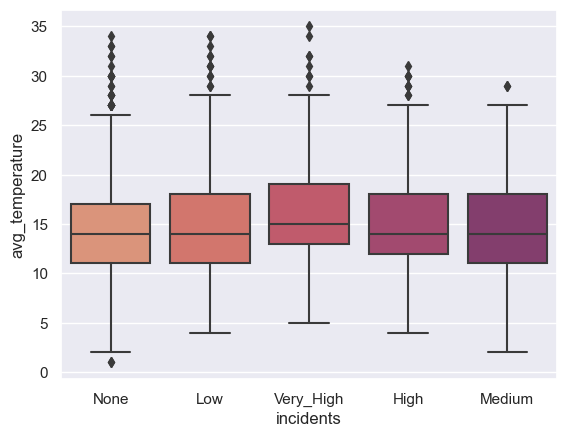

In [64]:
ax = sns.boxplot(x=traffic["incidents"], y=traffic["avg_temperature"])

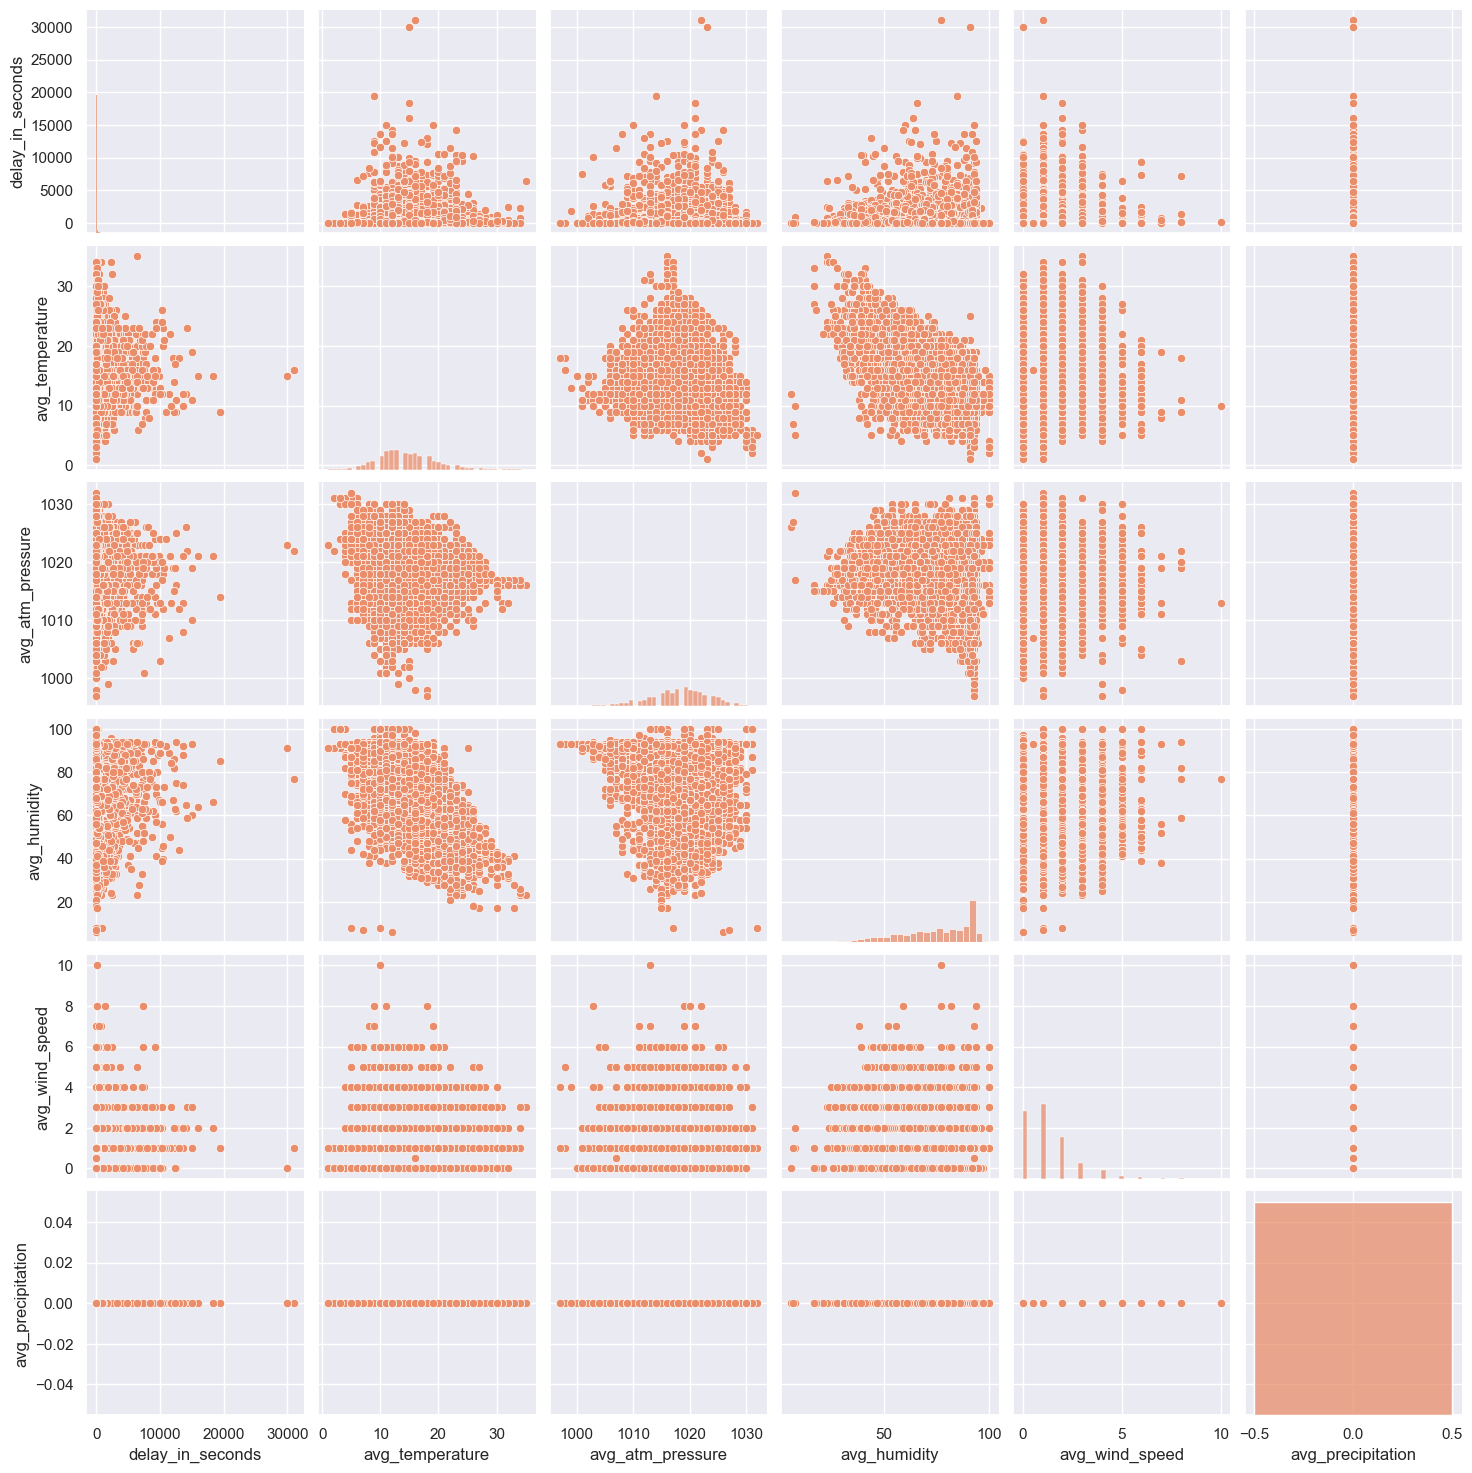

In [65]:
sns.pairplot(traffic)

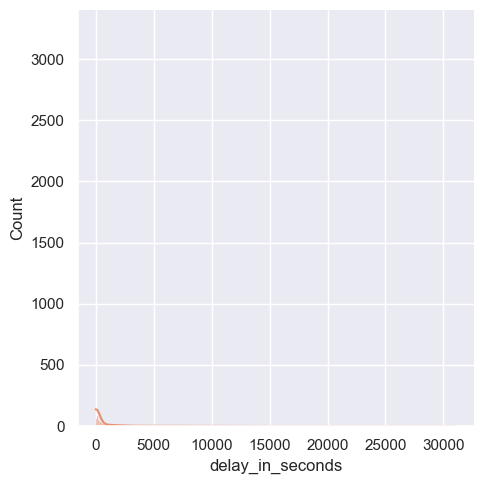

In [66]:
sns.displot(data=traffic, x="delay_in_seconds", kde=True)

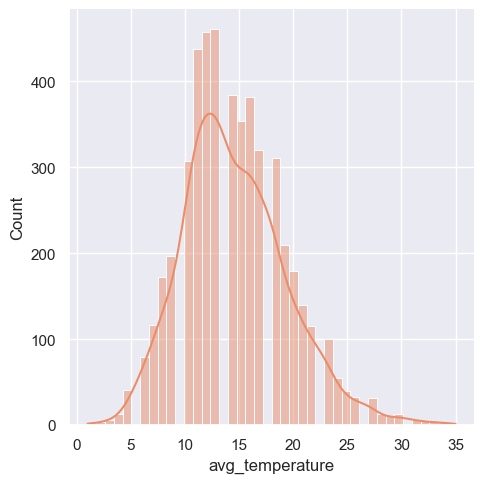

In [67]:
sns.displot(data=traffic, x="avg_temperature", kde=True)

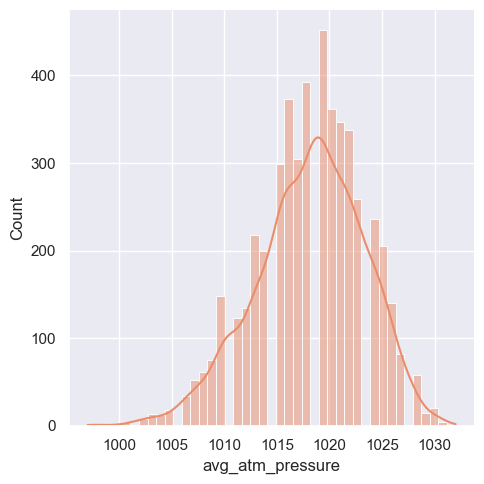

In [68]:
sns.displot(data=traffic, x="avg_atm_pressure", kde=True)

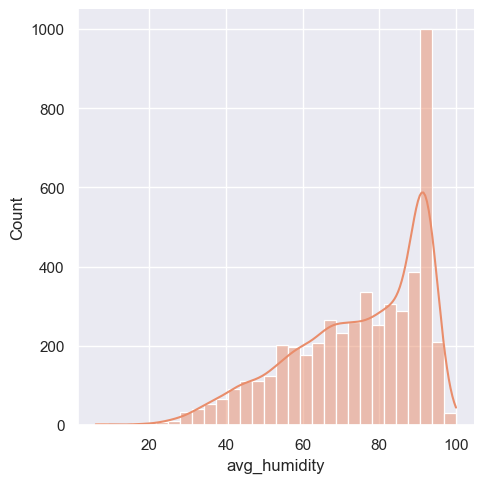

In [69]:
sns.displot(data=traffic, x="avg_humidity", kde=True)

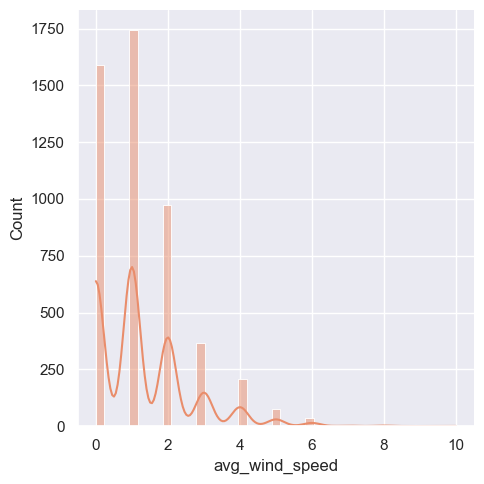

In [70]:
sns.displot(data=traffic, x="avg_wind_speed", kde=True)

## Data Preparation

### Tratamento dos dados

   * O *city_name* pode ser eliminado visto que é sempre Gimarães
   * O *avg_precipitation* também pode ser eliminado já que é sempre 0.
   * O *record_date* pode ser dividido em 4 colunas (hora, dia, mês, ano).
   * O *incidents* devemos passar para o tipo int(None=0, Low=1, Medium=2,High=3, Very High=4)
   * A *luminosity* pode ser passada para o tipo int(Dark=0, Low Light=1, Light=2)
   * O *magnitude_of_delay* também passa para int(UNDEFINED=0, MAJOR=1, MODERATE=2)
   * Da mesma forma o *avg_rain* passa para int(Sem Chuva=0, chuva fraca=1, chuva moderada=2, chuva forte =3)
   * *affected_roads o que fazr?*
   
### Drop redundant columns

In [71]:
# DROP
traffic.drop(['city_name'], axis=1, inplace=True)
traffic.drop(['avg_precipitation'], axis=1, inplace=True)

test.drop(['city_name'], axis=1, inplace=True)
test.drop(['avg_precipitation'], axis=1, inplace=True)

### Handling missing data

In [72]:
# Remover as entradas que têm NaN
traffic.drop(['affected_roads'], axis=1, inplace=True)
#sns.heatmap(traffic.isnull(),yticklabels=False, cbar=False, cmap='viridis')

test.drop(['affected_roads'], axis=1, inplace=True)
#sns.heatmap(traffic.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Handling categoric data

In [73]:
#tratamento de incidents, luminosity, affected_roads, magnitude_of_delay
traffic["incidents"] = traffic['incidents'].replace({'None' : 0, 'Low' : 1, 'Medium' : 2, 'High' : 3, 'Very_High' : 4}).astype(int)
traffic["luminosity"] = traffic['luminosity'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)
traffic["avg_rain"] = traffic['avg_rain'].replace({'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}).astype(int)
traffic["magnitude_of_delay"] = traffic['magnitude_of_delay'].replace({'UNDEFINED' : 0, 'MAJOR' : 1, 'MODERATE' : 2}).astype(int)

test["luminosity"] = test['luminosity'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)
test["avg_rain"] = test['avg_rain'].replace({'Sem Chuva' : 0, 'chuva fraca' : 1, 'chuva moderada' : 2, 'chuva forte' : 3}).astype(int)
test["magnitude_of_delay"] = test['magnitude_of_delay'].replace({'UNDEFINED' : 0, 'MAJOR' : 1, 'MODERATE' : 2}).astype(int)

traffic.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,0,2021-03-15 23:00,0,12.0,1013.0,70.0,1.0,0,0
1,0,385,2021-12-25 18:00,0,12.0,1007.0,91.0,1.0,0,0
2,0,69,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,0,1
3,1,2297,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,0,4
4,0,0,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,0,3


In [74]:
#tratamento da coluna record_date
traffic['record_date'] = pd.to_datetime(traffic['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')
assert traffic['record_date'].isnull().sum() == 0

traffic['record_date'].head()

test['record_date'] = pd.to_datetime(test['record_date'], format='%Y-%m-%d %H:%M', errors='coerce')
assert test['record_date'].isnull().sum() == 0
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  1206 non-null   int64         
 1   delay_in_seconds    1206 non-null   int64         
 2   record_date         1206 non-null   datetime64[ns]
 3   luminosity          1206 non-null   int64         
 4   avg_temperature     1206 non-null   float64       
 5   avg_atm_pressure    1206 non-null   float64       
 6   avg_humidity        1206 non-null   float64       
 7   avg_wind_speed      1206 non-null   float64       
 8   avg_rain            1206 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 84.9 KB


In [75]:
traffic['year'] = traffic['record_date'].dt.year
traffic['month'] = traffic['record_date'].dt.month
traffic['day'] = traffic['record_date'].dt.day
traffic['hour'] = traffic['record_date'].dt.hour
traffic['minute'] = traffic['record_date'].dt.minute
traffic.drop('record_date', axis=1, inplace=True)

test['year'] = test['record_date'].dt.year
test['month'] = test['record_date'].dt.month
test['day'] = test['record_date'].dt.day
test['hour'] = test['record_date'].dt.hour
test['minute'] = test['record_date'].dt.minute
test.drop('record_date', axis=1, inplace=True)

traffic.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,year,month,day,hour,minute
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,2021,3,15,23,0
1,0,385,0,12.0,1007.0,91.0,1.0,0,0,2021,12,25,18,0
2,0,69,2,14.0,1025.0,64.0,0.0,0,1,2021,3,12,15,0
3,1,2297,2,15.0,1028.0,75.0,1.0,0,4,2021,9,29,9,0
4,0,0,2,27.0,1020.0,52.0,1.0,0,3,2021,6,13,11,0


In [76]:
traffic.nunique()

magnitude_of_delay       3
delay_in_seconds      1186
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
year                     1
month                   11
day                     31
hour                    24
minute                   1
dtype: int64

In [77]:
traffic.drop('year', axis=1, inplace=True)
traffic.drop('minute', axis=1, inplace=True)

test.drop('year', axis=1, inplace=True)
test.drop('minute', axis=1, inplace=True)

In [78]:
traffic.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,month,day,hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,0,12,25,18
2,0,69,2,14.0,1025.0,64.0,0.0,0,1,3,12,15
3,1,2297,2,15.0,1028.0,75.0,1.0,0,4,9,29,9
4,0,0,2,27.0,1020.0,52.0,1.0,0,3,6,13,11


<AxesSubplot: >

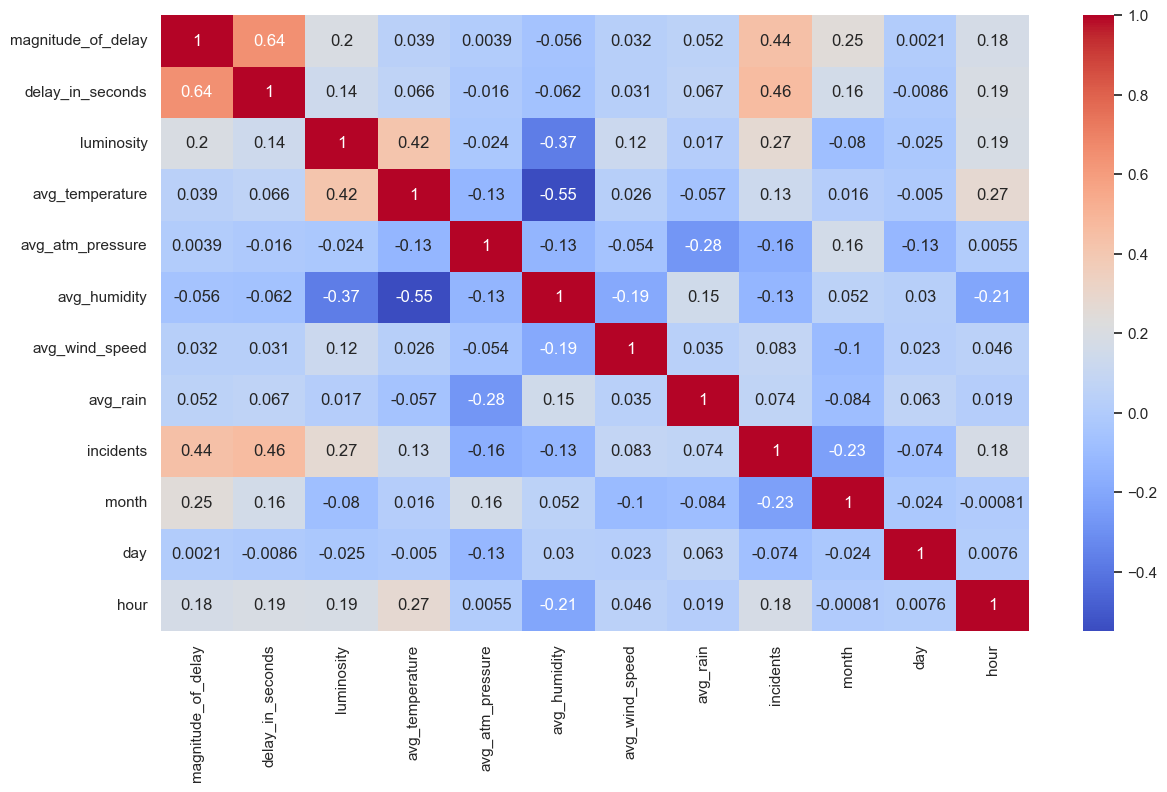

In [79]:
plt.subplots(figsize=(14,8))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

## Model Training

In [80]:
#divisão do target
x = traffic.drop(['incidents'], axis=1) # input features - everything except the incidents feature
y = traffic['incidents']                # target feature - incidents

x

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,month,day,hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,12,25,18
2,0,69,2,14.0,1025.0,64.0,0.0,0,3,12,15
3,1,2297,2,15.0,1028.0,75.0,1.0,0,9,29,9
4,0,0,2,27.0,1020.0,52.0,1.0,0,6,13,11
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,13.0,1021.0,56.0,0.0,0,4,13,0
4996,0,0,2,19.0,1017.0,68.0,0.0,0,7,6,14
4997,0,0,0,13.0,1023.0,47.0,2.0,0,3,18,3
4998,0,0,0,12.0,1014.0,93.0,2.0,0,11,2,6


In [81]:
y

0       0
1       0
2       1
3       4
4       3
       ..
4995    3
4996    0
4997    0
4998    0
4999    0
Name: incidents, Length: 5000, dtype: int64

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2411, random_state=2022)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 3419 to 922
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  1206 non-null   int64  
 1   delay_in_seconds    1206 non-null   int64  
 2   luminosity          1206 non-null   int64  
 3   avg_temperature     1206 non-null   float64
 4   avg_atm_pressure    1206 non-null   float64
 5   avg_humidity        1206 non-null   float64
 6   avg_wind_speed      1206 non-null   float64
 7   avg_rain            1206 non-null   int64  
 8   month               1206 non-null   int64  
 9   day                 1206 non-null   int64  
 10  hour                1206 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 113.1 KB


### DecisionTree

In [86]:
clf = DecisionTreeClassifier(random_state=2022)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
predictions

array([1, 4, 0, ..., 2, 4, 3])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       506
           1       0.89      0.83      0.86       161
           2       0.84      0.82      0.83       138
           3       0.86      0.88      0.87       252
           4       0.88      0.85      0.86       149

    accuracy                           0.91      1206
   macro avg       0.89      0.87      0.88      1206
weighted avg       0.91      0.91      0.91      1206



/home/kaufman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


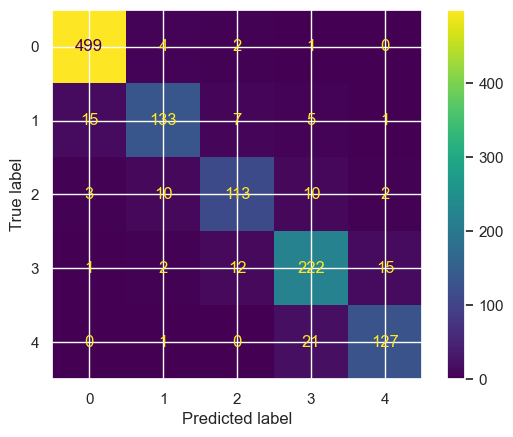

In [87]:
print(classification_report(Y_test, predictions))
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

### RandomForest

In [98]:
# Random Forest
clf = RandomForestClassifier(n_estimators=500, random_state=2022, criterion='entropy')
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       506
           1       0.85      0.86      0.86       161
           2       0.89      0.78      0.83       138
           3       0.90      0.91      0.91       252
           4       0.91      0.95      0.93       149

    accuracy                           0.92      1206
   macro avg       0.90      0.90      0.90      1206
weighted avg       0.92      0.92      0.92      1206



/home/kaufman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

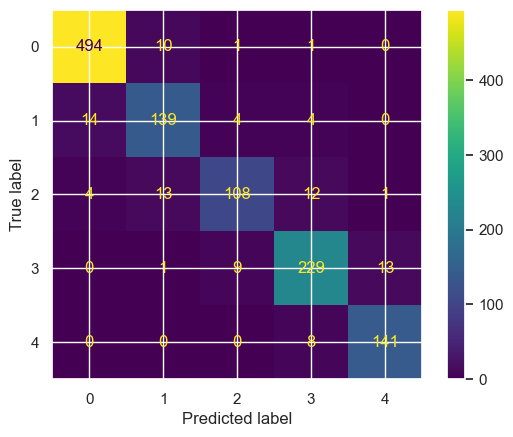

In [89]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### BaggingClassifier

In [90]:
# Bagging normal 72 %
clf = BaggingClassifier(KNeighborsClassifier(), random_state=2022, max_samples=0.5, max_features=0.5)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.96      0.79       506
           1       0.57      0.41      0.48       161
           2       0.79      0.24      0.37       138
           3       0.64      0.46      0.54       252
           4       0.77      0.74      0.75       149

    accuracy                           0.67      1206
   macro avg       0.69      0.56      0.59      1206
weighted avg       0.68      0.67      0.64      1206



/home/kaufman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

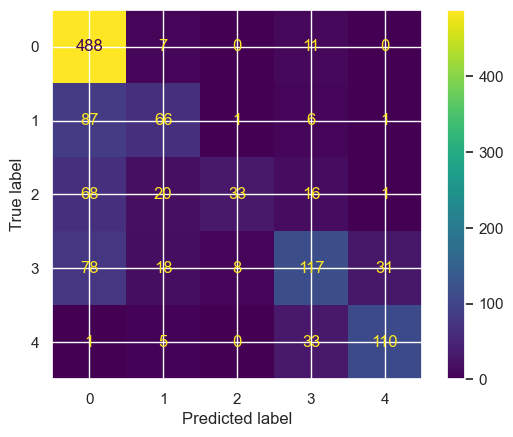

In [91]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### ExtraTreesClassifier

In [92]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       506
           1       0.77      0.81      0.79       161
           2       0.85      0.70      0.76       138
           3       0.85      0.88      0.86       252
           4       0.88      0.87      0.88       149

    accuracy                           0.88      1206
   macro avg       0.86      0.84      0.85      1206
weighted avg       0.88      0.88      0.88      1206



/home/kaufman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

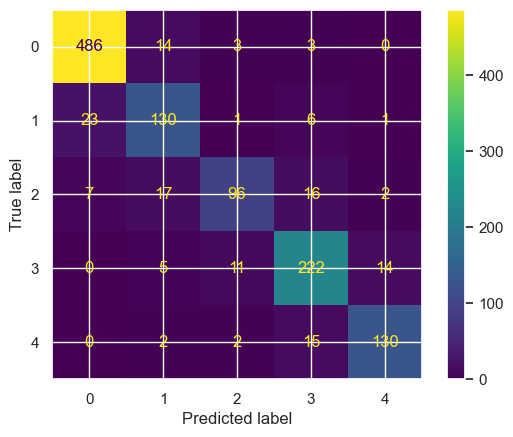

In [93]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### AdaBoostClassifier

In [94]:
clf = AdaBoostClassifier(n_estimators=100, random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       506
           1       0.71      0.70      0.70       161
           2       0.26      0.26      0.26       138
           3       0.74      0.75      0.74       252
           4       0.78      0.89      0.83       149

    accuracy                           0.73      1206
   macro avg       0.66      0.68      0.67      1206
weighted avg       0.73      0.73      0.73      1206



/home/kaufman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

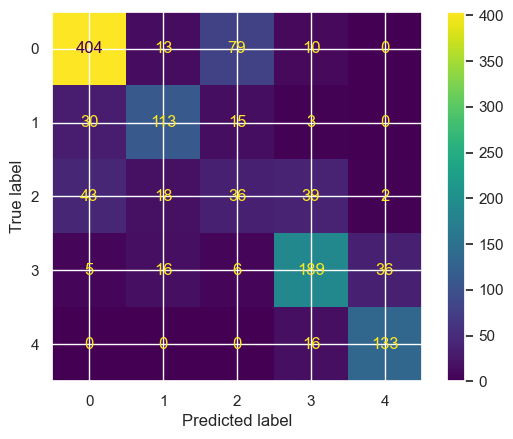

In [95]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### GradientBoostingClassifier

In [96]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       506
           1       0.70      0.73      0.72       161
           2       0.62      0.38      0.47       138
           3       0.79      0.83      0.81       252
           4       0.89      0.90      0.89       149

    accuracy                           0.82      1206
   macro avg       0.78      0.76      0.76      1206
weighted avg       0.81      0.82      0.81      1206



/home/kaufman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

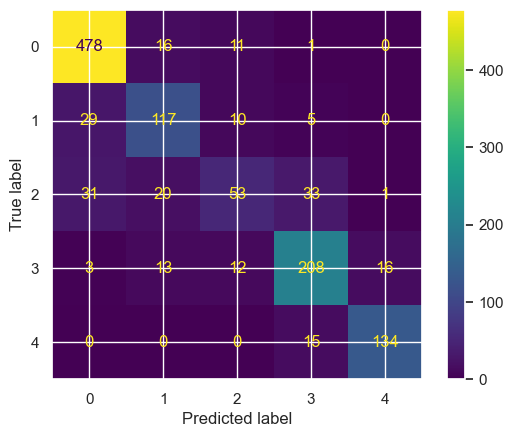

In [97]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

Saving the results in CSV file

In [47]:
# acrescentar headers
submission = pd.DataFrame(predictions, columns = ["Incidents"])
submission.insert(0, "RowId", range(1,1207), True)
submission.nunique()

#transformação dos valores para formato escrito
submission['Incidents']= submission['Incidents'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})
submission.info()

#passagem para ficheiro csv
submission.to_csv('submission.csv', index=False)

submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RowId      1200 non-null   int64 
 1   Incidents  1200 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB
